# Analysis of Deaths in 2004

In this project, I used data taken from the Office for National Statistics to analyse the deaths recorded in England and Wales in 2004

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(filepath)

In [4]:
df

,ICD-10,Sex,Age,Number of deaths
0,NaN,1,Neonates,"1,249"
1,NaN,2,Neonates,990
2,A021,2,<1,1
3,A080,1,<1,1
4,A080,2,<1,1
...,...,...,...,...
20949,Y848,1,85+,2
20950,Y848,2,85+,1
20951,Y86,1,85+,1
20952,Y86,2,85+,3


ICD-10 is the International Classification of Diseases,Tenth Revision and it indicates the cause of death.

Sex is categorised as 1 being Male and 2 being Female


### Cleaning Data

The 'Number of deaths' column has its values as object data types and must be converted into integer data types. In order to do this, the commas will be removed.

In [5]:
df['Number of deaths'] = df['Number of deaths'].replace(',','', regex=True)

In [6]:
df['Number of deaths'] = df['Number of deaths'].astype('int')

In [7]:
df['Number of deaths']

0        1249
1         990
2           1
3           1
4           1
         ... 
20949       2
20950       1
20951       1
20952       3
20953       1
Name: Number of deaths, Length: 20954, dtype: int64

### Most Common Causes of Death for Males

In [8]:
male = df[df['Sex'] == 1]

In [9]:
max(male['ICD-10'].value_counts())

19

In [10]:
male['ICD-10'].value_counts()[male['ICD-10'].value_counts() == 19]

C64     19
Y339    19
G809    19
R99     19
G409    19
C719    19
A419    19
Name: ICD-10, dtype: int64

The most common causes for death for men were:

C64 - Malignant neoplasm of kidney

Y339 - Suicide and Undetermined Injury

G809 - Cerebral Palsy

R99 - Other ill-defined and unspecified causes of mortality

G409 - Epilepsy, unspecified

C719 - Malignant neoplasm: Brain, unspecified

A419 - Sepsis, unspecified organism

### Most Common Causes of Death for Females

In [11]:
female = df[df['Sex'] == 2]

In [12]:
max(female['ICD-10'].value_counts())

19

In [13]:
female['ICD-10'].value_counts()[female['ICD-10'].value_counts() == 19]

C719    19
I514    19
C920    19
J189    19
A419    19
R99     19
Name: ICD-10, dtype: int64

The most common causes of death for women were:

C719 - Malignant neoplasm: Brain, unspecified

I514 - Myocarditis, unspecified

C920 - Acute myeloblastic leukemia

J189 - Pneumonia, unspecified organism

A419 - Sepsis, unspecified organism

R99 - Other ill-defined and unspecified causes of mortality

### Graphs

In [14]:
male_deaths = male.groupby('Age').sum()['Number of deaths'].values

In [15]:
female_deaths = female.groupby('Age').sum()['Number of deaths'].values

In [16]:
age_groups = male.groupby('Age').sum().index

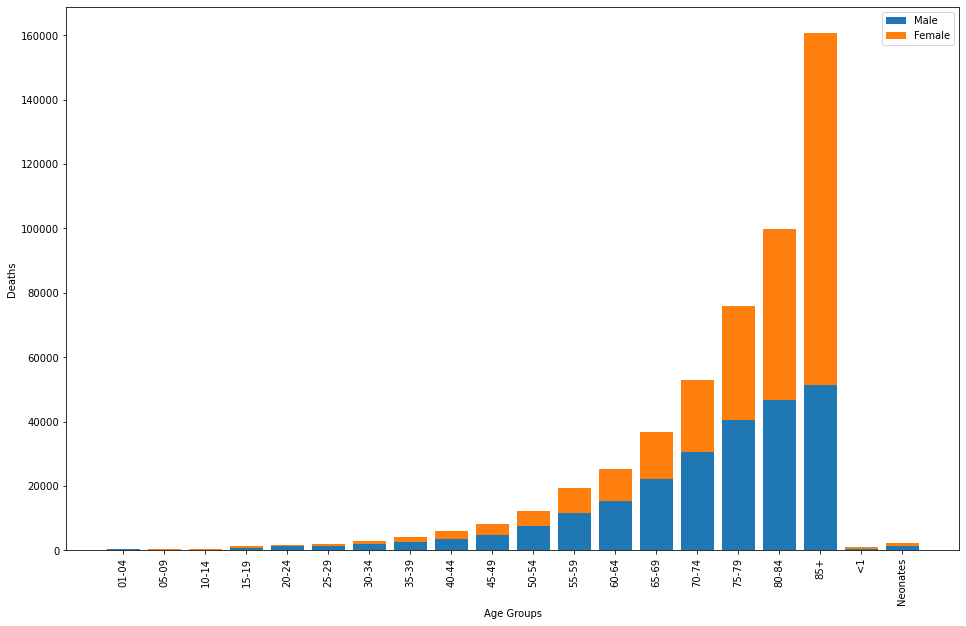

In [28]:
fig, ax = plt.subplots()


fig.set_size_inches(16, 10)

plt.xticks(rotation=90)



ax.bar(age_groups, male_deaths, label='Male')
ax.bar(age_groups, female_deaths, bottom=male_deaths, label='Female')


ax.legend()
ax.set_xlabel('Age Groups')
ax.set_ylabel('Deaths')





plt.show()

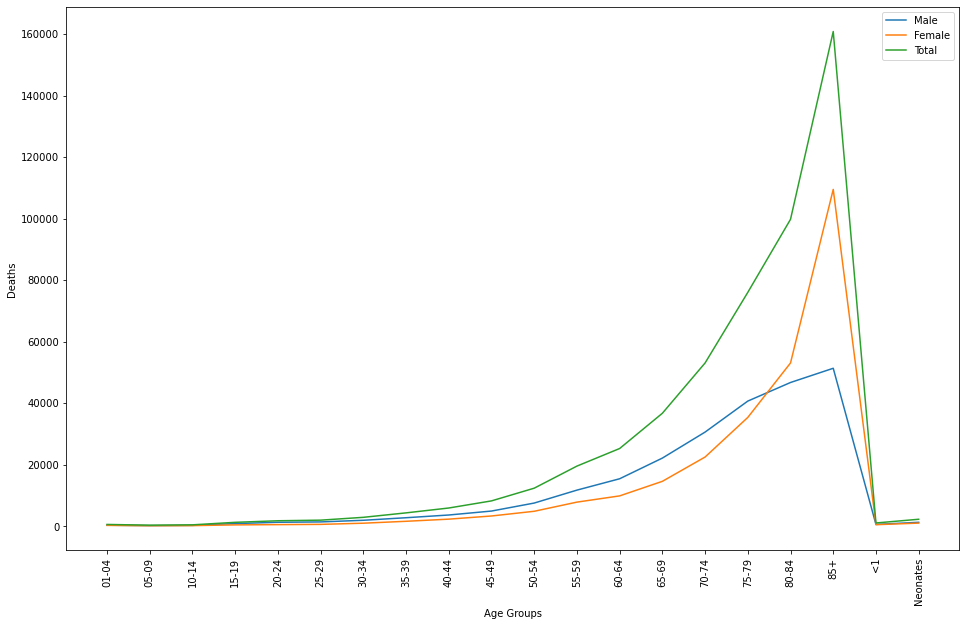

In [29]:
fig, ax =plt.subplots()

plt.xticks(rotation=90)

fig.set_size_inches(16, 10)

ax.plot(age_groups, male_deaths, label='Male')
ax.plot(age_groups, female_deaths, label='Female')
ax.plot(age_groups, female_deaths+male_deaths, label='Total')

ax.legend()
ax.set_xlabel('Age Groups')
ax.set_ylabel('Deaths')

plt.show()

These graphs show that females tend to die later than males as indicated by the greater peak at the older ages, given that the number of males and females in the data are roughly the same:

In [19]:
male.groupby('Age').sum()['Number of deaths'].sum()

245208

In [20]:
female.groupby('Age').sum()['Number of deaths'].sum()

269042

The female graph has a much steeper peak, whereas the male graph has a more gradual increase. This indicates that the age males die is much more varied than that of females.